In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Создание точек
def generate_points(a: float, b: float, x0: float, y0: float):
    t = np.arange(0, 2*np.pi, 0.025)
    points = np.zeros((t.shape[0], 2))
    points[:, 0] = a * np.cos(t) + x0
    points[:, 1] = b * np.sin(t) + y0
    return points

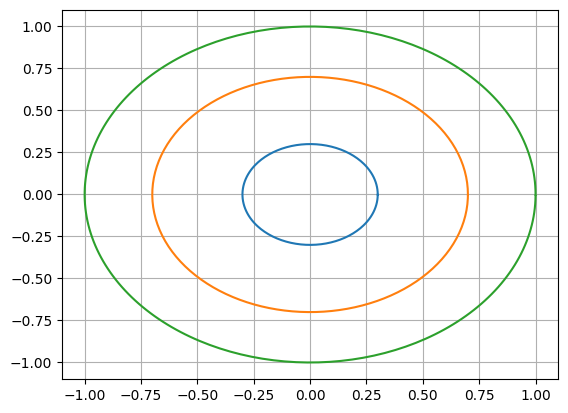

In [3]:
# Создание выборки
points1 = generate_points(0.3, 0.3, 0, 0)
points2 = generate_points(0.7, 0.7, 0, 0)
points3 = generate_points(1, 1, 0, 0)
plt.plot(points1[:, 0], points1[:, 1])
plt.plot(points2[:, 0], points2[:, 1])
plt.plot(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

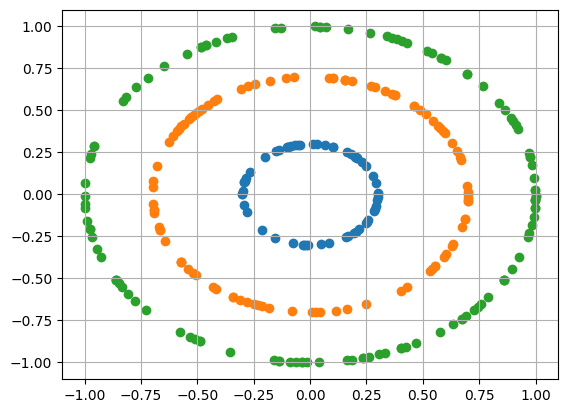

In [4]:
# Разбиение выборки
points1 = points1[np.random.choice(points1.shape[0], 60),:]
points2 = points2[np.random.choice(points2.shape[0], 100),:]
points3 = points3[np.random.choice(points3.shape[0], 120),:]

plt.scatter(points1[:, 0], points1[:, 1])
plt.scatter(points2[:, 0], points2[:, 1])
plt.scatter(points3[:, 0], points3[:, 1])
plt.grid(True)
plt.show()

In [5]:
# Подготовка выборки
features = np.concatenate((points1, points2, points3))
labels = np.concatenate((np.full(60, 0), np.full(100, 1), np.full(120, 2)))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=23)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=26)
print(x_train.shape[0] / 280, x_valid.shape[0] / 280, x_test.shape[0] / 280)

0.7 0.2 0.1


In [7]:
# Создание модели
model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(25, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=["accuracy"]
)

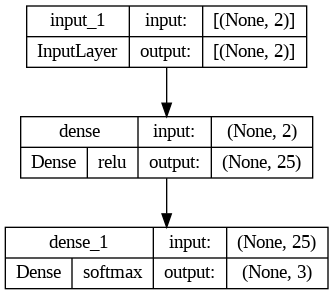

In [8]:
keras.utils.plot_model(model,show_shapes=True, show_layer_activations=True)

In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 1s 18ms/step - loss: 1.1009 - accuracy: 0.2806
Epoch 2/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.0871 - accuracy: 0.2755
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.0739 - accuracy: 0.4031
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 1.0627 - accuracy: 0.3724
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.0524 - accuracy: 0.3571
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.0426 - accuracy: 0.3418
Epoch 7/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.0343 - accuracy: 0.3367
Epoch 8/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0272 - accuracy: 0.3622
Epoch 9/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.0201 - accuracy: 0.3827
Epoch 10/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.0141 - accuracy: 0.3878
Epoch 11/1000
7/7 [===========

In [10]:
a = np.mgrid[-1.2:1.2:0.025, -1.2:1.2:0.025].reshape(2, -1).T


In [11]:
labels = model.predict(a)
labels = labels.argmax(1)

288/288 [==============================] - 1s 1ms/step


In [12]:
set(labels)

{0, 1, 2}

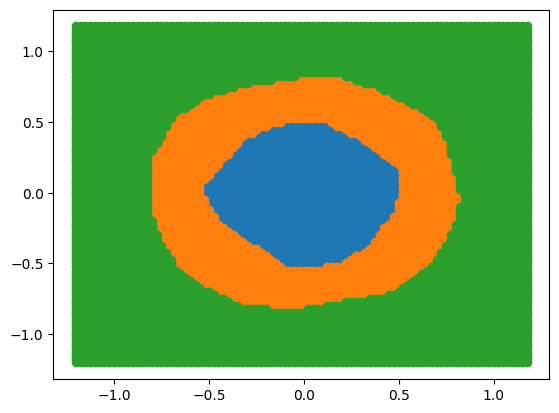

In [13]:
# Разметка пространства сетью
plt.scatter(a[labels==0,0],a[labels==0,1])
plt.scatter(a[labels==1,0],a[labels==1,1])
plt.scatter(a[labels==2,0],a[labels==2,1])

##### Модель достаточно хорошо решила задачу. А также верно классифицировала области.

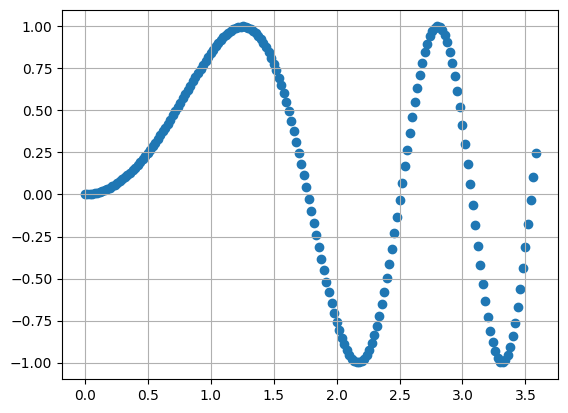

In [14]:
# Создание выборки
xt = lambda t: np.sin(t*t)
features = np.arange(0, 4, 0.02)
targets = xt(features)
n = int(0.9 * features.shape[0])
x_train, y_train = features[:n], targets[:n]
x_test, y_test = features[n:], targets[n:]
plt.scatter(x_train, y_train)
plt.grid(True)
plt.show()

In [15]:
# Создание модели
approx_model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(10, activation='relu', use_bias=True),
    layers.Dense(30, activation='relu', use_bias=True),
    layers.Dense(1)
])
approx_model.compile(
    loss='mse',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['mse', 'mae', keras.metrics.RootMeanSquaredError()]
)

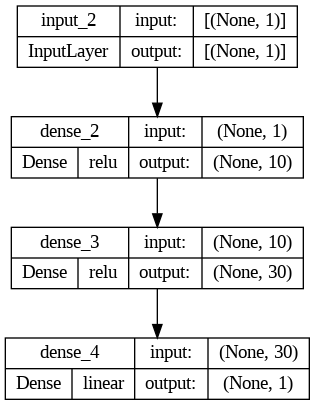

In [16]:
keras.utils.plot_model(approx_model,show_shapes=True, show_layer_activations=True)

In [17]:
# Обучаем
approx_model.fit(x_train, y_train, epochs=1200, batch_size=20)

Epoch 1/1200
9/9 [==============================] - 1s 3ms/step - loss: 0.4236 - mse: 0.4236 - mae: 0.5414 - root_mean_squared_error: 0.6508
Epoch 2/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3748 - mse: 0.3748 - mae: 0.5144 - root_mean_squared_error: 0.6122
Epoch 3/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3652 - mse: 0.3652 - mae: 0.4935 - root_mean_squared_error: 0.6043
Epoch 4/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3392 - mse: 0.3392 - mae: 0.4779 - root_mean_squared_error: 0.5824
Epoch 5/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3314 - mse: 0.3314 - mae: 0.4633 - root_mean_squared_error: 0.5757
Epoch 6/1200
9/9 [==============================] - 0s 2ms/step - loss: 0.3389 - mse: 0.3389 - mae: 0.4563 - root_mean_squared_error: 0.5822
Epoch 7/1200
9/9 [==============================] - 0s 4ms/step - loss: 0.3289 - mse: 0.3289 - mae: 0.4494 - root_mean_squared_error: 0.5735
Epoch 8/1200


In [18]:
train_predictions = approx_model.predict(x_train)
test_predictions = approx_model.predict(x_test)

1/1 [==============================] - 0s 19ms/step


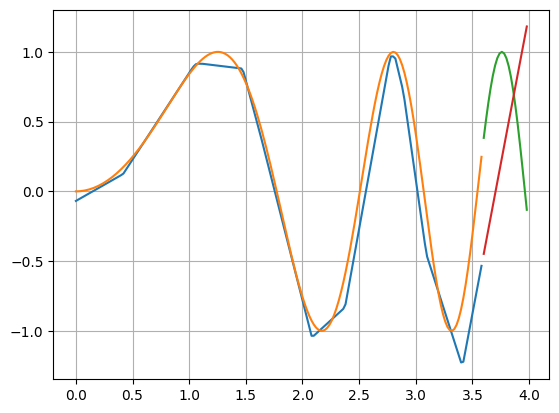

In [19]:
# Отображаем обучающую и тестовую выборки, предсказания на них
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)

plt.grid(True)
plt.show()

In [20]:
del approx_model
# Создаем модель
approx_model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(10, activation='relu', use_bias=True),
    layers.Dense(30, activation='relu', use_bias=True),
    layers.Dense(1)
])
approx_model.compile(
    loss='mse',
    optimizer=keras.optimizers.Nadam(learning_rate=0.01),
    metrics=['mse', 'mae', keras.metrics.RootMeanSquaredError()]
)

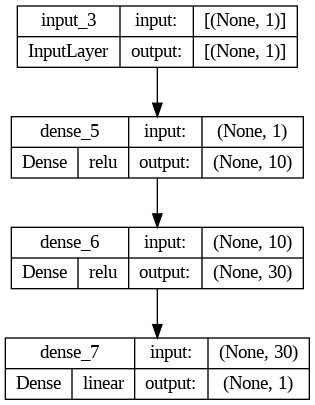

In [21]:
keras.utils.plot_model(approx_model,show_shapes=True, show_layer_activations=True)

In [22]:
# Обучаем модел
approx_model.fit(x_train, y_train, batch_size=20, epochs=1200)

Epoch 1/1200
9/9 [==============================] - 1s 3ms/step - loss: 0.4225 - mse: 0.4225 - mae: 0.5503 - root_mean_squared_error: 0.6500
Epoch 2/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3868 - mse: 0.3868 - mae: 0.5247 - root_mean_squared_error: 0.6219
Epoch 3/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3568 - mse: 0.3568 - mae: 0.5050 - root_mean_squared_error: 0.5974
Epoch 4/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3451 - mse: 0.3451 - mae: 0.4906 - root_mean_squared_error: 0.5874
Epoch 5/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3436 - mse: 0.3436 - mae: 0.4855 - root_mean_squared_error: 0.5862
Epoch 6/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3272 - mse: 0.3272 - mae: 0.4671 - root_mean_squared_error: 0.5720
Epoch 7/1200
9/9 [==============================] - 0s 3ms/step - loss: 0.3193 - mse: 0.3193 - mae: 0.4526 - root_mean_squared_error: 0.5650
Epoch 8/1200


In [23]:
train_predictions = approx_model.predict(x_train)
test_predictions = approx_model.predict(x_test)

1/1 [==============================] - 0s 21ms/step


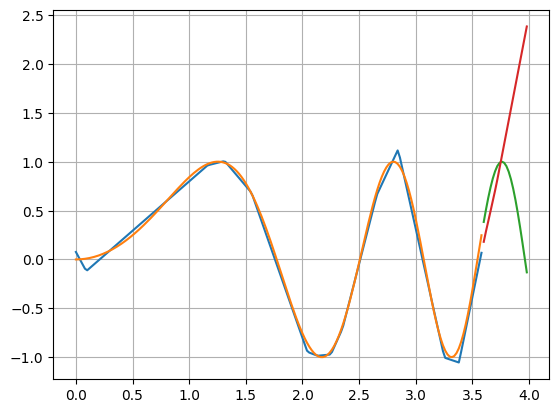

In [24]:
# Отображаем обучающую и тестовую выборки, предсказания на них
plt.plot(x_train, train_predictions)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)
plt.plot(x_test, test_predictions)

plt.grid(True)
plt.show()

##### Nadam показала себя лучше чем RMSprop.
#### На тестовой выборке оба метода показала верно общее начальное направление. Но не смогли верно пресказать наличие изгиба .